# Import Lib

In [1]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

2 .Display_Setting

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
sklearn.set_config(transform_output="pandas")


# Read Data

In [5]:
path = r"C:\Users\Bhagyashree\OneDrive\Desktop\Flights_predictions\Data\train.csv"

train_set = pd.read_csv(path)
train_set

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-09,Kolkata,Banglore,15:30:00,18:05:00,155,0.0,no info,5224
1,Multiple Carriers,2019-03-21,Delhi,Cochin,09:45:00,16:10:00,385,1.0,no info,7242
2,Multiple Carriers,2019-06-27,Delhi,Cochin,09:15:00,19:00:00,585,1.0,no info,11622
3,Jet Airways,2019-06-03,Banglore,Delhi,07:10:00,10:10:00,180,0.0,In-flight meal not included,5769
4,Goair,2019-03-03,Delhi,Cochin,07:00:00,12:50:00,350,1.0,no info,7378
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-06-03,Delhi,Cochin,14:10:00,17:10:00,180,0.0,no info,6934
636,Indigo,2019-03-21,Delhi,Cochin,09:10:00,21:00:00,710,1.0,no info,8285
637,Indigo,2019-03-03,Delhi,Cochin,02:35:00,08:30:00,355,1.0,no info,13790
638,Multiple Carriers,2019-03-09,Delhi,Cochin,07:00:00,19:45:00,765,1.0,no info,15237


In [6]:
train_set.info

<bound method DataFrame.info of                airline date_of_journey    source destination  dep_time  \
0               Indigo      2019-06-09   Kolkata    Banglore  15:30:00   
1    Multiple Carriers      2019-03-21     Delhi      Cochin  09:45:00   
2    Multiple Carriers      2019-06-27     Delhi      Cochin  09:15:00   
3          Jet Airways      2019-06-03  Banglore       Delhi  07:10:00   
4                Goair      2019-03-03     Delhi      Cochin  07:00:00   
..                 ...             ...       ...         ...       ...   
635          Air India      2019-06-03     Delhi      Cochin  14:10:00   
636             Indigo      2019-03-21     Delhi      Cochin  09:10:00   
637             Indigo      2019-03-03     Delhi      Cochin  02:35:00   
638  Multiple Carriers      2019-03-09     Delhi      Cochin  07:00:00   
639             Indigo      2019-06-03     Delhi      Cochin  14:25:00   

    arrival_time  duration  total_stops              additional_info  price  
0

In [7]:
x_train=train_set.drop(columns="price")
y_train=train_set.price.copy()

# Transformation Operations

## 1 Airline

In [8]:
x_train.airline.value_counts()

airline
Jet Airways          210
Indigo               136
Air India            100
Multiple Carriers     81
Spicejet              48
Vistara               35
Air Asia              23
Goair                  6
Vistara                1
Name: count, dtype: int64

## Imputation 

## for airline we used 
###  1 grouprarelabel
### 2 onehotencoding

In [9]:
air_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent")),
                                ("grouper",RareLabelEncoder(tol=0.1,replace_with="other",n_categories=2)),
                                ("encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
                               ])

In [10]:
air_transformer.fit_transform(x_train.loc[:,["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_other
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
635,1.0,0.0,0.0,0.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,0.0,0.0,1.0,0.0


 ## 2. date_of_journey

In [11]:
x_train.date_of_journey

0      2019-06-09
1      2019-03-21
2      2019-06-27
3      2019-06-03
4      2019-03-03
          ...    
635    2019-06-03
636    2019-03-21
637    2019-03-03
638    2019-03-09
639    2019-06-03
Name: date_of_journey, Length: 640, dtype: object

# datetimefeature extraction

In [12]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(x_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,1.0,0.823529,1.000000,0.847458
1,0.0,0.176471,0.500000,0.169492
2,1.0,1.000000,0.500000,1.000000
3,1.0,0.823529,0.000000,0.796610
4,0.0,0.000000,1.000000,0.016949
...,...,...,...,...
635,1.0,0.823529,0.000000,0.796610
636,0.0,0.176471,0.500000,0.169492
637,0.0,0.000000,1.000000,0.016949
638,0.0,0.058824,0.833333,0.067797


# Source and distanation

In [13]:
location_subset =x_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Kolkata,Banglore
1,Delhi,Cochin
2,Delhi,Cochin
3,Banglore,Delhi
4,Delhi,Cochin
...,...,...
635,Delhi,Cochin
636,Delhi,Cochin
637,Delhi,Cochin
638,Delhi,Cochin


In [19]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-0.146465,-0.118583,1,0
1,1.015546,1.016939,1,0
2,1.015546,1.016939,1,0
3,-0.915342,-1.814522,0,1
4,1.015546,1.016939,1,0
...,...,...,...,...
635,1.015546,1.016939,1,0
636,1.015546,1.016939,1,0
637,1.015546,1.016939,1,0
638,1.015546,1.016939,1,0


# Endcoder and using Power_Transformer

In [15]:

location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-0.146465,-0.118583
1,1.015546,1.016939
2,1.015546,1.016939
3,-0.915342,-1.814522
4,1.015546,1.016939
...,...,...
635,1.015546,1.016939
636,1.015546,1.016939
637,1.015546,1.016939
638,1.015546,1.016939


In [ ]:
np.union1d(
	x_train.source.unique(),
	x_train.destination.unique()
)

In [17]:
def is_north(X):
	columns = X.columns.to_list()
	north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)



In [18]:
FunctionTransformer(func=is_north).fit_transform(location_subset)


,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
635,1,0
636,1,0
637,1,0
638,1,0


# Dep time & Arrival_time

In [20]:

time_subset = x_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,15:30:00,18:05:00
1,09:45:00,16:10:00
2,09:15:00,19:00:00
3,07:10:00,10:10:00
4,07:00:00,12:50:00
...,...,...
635,14:10:00,17:10:00
636,09:10:00,21:00:00
637,02:35:00,08:30:00
638,07:00:00,19:45:00


In [21]:
time_pipe1 = Pipeline(steps=[
	 ("dt", DatetimeFeatures(features_to_extract=["hour", "minute"], format="mixed")),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.652174,0.545455,0.782609,0.090909
1,0.391304,0.818182,0.695652,0.181818
2,0.391304,0.272727,0.826087,0.000000
3,0.304348,0.181818,0.434783,0.181818
4,0.304348,0.000000,0.521739,0.909091
...,...,...,...,...
635,0.608696,0.181818,0.739130,0.181818
636,0.391304,0.181818,0.913043,0.000000
637,0.086957,0.636364,0.347826,0.545455
638,0.304348,0.000000,0.826087,0.818182


In [39]:

def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,dep_time_part_of_day,arrival_time_part_of_day
0,afternoon,evening
1,morning,evening
2,morning,evening
3,morning,morning
4,morning,afternoon
...,...,...
635,afternoon,evening
636,morning,night
637,night,morning
638,morning,evening


In [40]:

time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])


time_pipe2.fit_transform(time_subset)

C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,dep_time_part_of_day,arrival_time_part_of_day
0,0.000000,0.492188
1,1.000000,0.492188
2,1.000000,0.492188
3,1.000000,0.851562
4,1.000000,0.000000
...,...,...
635,0.000000,0.492188
636,1.000000,1.000000
637,0.072165,0.851562
638,1.000000,0.492188


In [41]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])
time_transformer.fit_transform(time_subset)


C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.652174,0.545455,0.782609,0.090909,0.000000,0.492188
1,0.391304,0.818182,0.695652,0.181818,1.000000,0.492188
2,0.391304,0.272727,0.826087,0.000000,1.000000,0.492188
3,0.304348,0.181818,0.434783,0.181818,1.000000,0.851562
4,0.304348,0.000000,0.521739,0.909091,1.000000,0.000000
...,...,...,...,...,...,...
635,0.608696,0.181818,0.739130,0.181818,0.000000,0.492188
636,0.391304,0.181818,0.913043,0.000000,1.000000,1.000000
637,0.086957,0.636364,0.347826,0.545455,0.072165,0.851562
638,0.304348,0.000000,0.826087,0.818182,1.000000,0.492188


# 4.5 Duration

In [ ]:
x_train.duration

## using this because of following reasons
### Your duration is skewed and spread out.

### Percentile comparison is robust to outliers.

###  RBF kernel similarity smoothly encodes how typical or extreme a value is.

### It creates a cleaner feature for machine learning or anomaly detection.



In [42]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [24]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(x_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,0.0,0.904837,0.904837
1,8.194013e-40,0.0,1.000000,1.000000
2,0.000000e+00,0.0,1.000000,1.000000
3,0.000000e+00,0.0,0.904837,0.904837
4,8.208500e-02,0.0,1.000000,1.000000
...,...,...,...,...
635,0.000000e+00,0.0,0.904837,0.904837
636,0.000000e+00,0.0,1.000000,1.000000
637,1.000000e+00,0.0,1.000000,1.000000
638,0.000000e+00,0.0,1.000000,1.000000


In [43]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [44]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [45]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(x_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.364242,-0.132836,-0.08041,0.0,0,-0.958273
1,-0.364242,-0.132836,-0.08041,1.0,0,-0.492517
2,-0.364242,-0.132836,-0.08041,2.0,0,-0.087511
3,-0.361156,-0.132836,-0.08041,1.0,0,-0.907647
4,-0.364242,-0.132836,-0.08041,1.0,0,-0.563393
...,...,...,...,...,...,...
635,-0.361156,-0.132836,-0.08041,1.0,0,-0.907647
636,-0.364242,-0.132836,-0.08041,2.0,0,0.165617
637,-0.364242,-0.132836,-0.08041,1.0,0,-0.553268
638,-0.364242,-0.132836,-0.08041,2.0,0,0.276994


# Total Stops

In [46]:
x_train.total_stops

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
635    0.0
636    1.0
637    1.0
638    1.0
639    0.0
Name: total_stops, Length: 640, dtype: float64

## lets make a category like is flight direct or not 

In [47]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(x_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,0.0,1
1,1.0,0
2,1.0,0
3,0.0,1
4,1.0,0
...,...,...
635,0.0,1
636,1.0,0
637,1.0,0
638,1.0,0


## additional_info

In [48]:
x_train.additional_info


0                          no info
1                          no info
2                          no info
3      In-flight meal not included
4                          no info
                  ...             
635                        no info
636                        no info
637                        no info
638                        no info
639                        no info
Name: additional_info, Length: 640, dtype: object

In [49]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_Other,additional_info_no info
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
635,0.0,0.0,1.0
636,0.0,0.0,1.0
637,0.0,0.0,1.0
638,0.0,0.0,1.0


In [50]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [51]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [52]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_Other,additional_info_no info,additional_info
0,0.0,0.0,1.0,1
1,0.0,0.0,1.0,1
2,0.0,0.0,1.0,1
3,1.0,0.0,0.0,1
4,0.0,0.0,1.0,1
...,...,...,...,...
635,0.0,0.0,1.0,1
636,0.0,0.0,1.0,1
637,0.0,0.0,1.0,1
638,0.0,0.0,1.0,1


# Column Transformer

In [53]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(x_train, y_train)

C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_Other,info__additional_info_no info,info__additional_info
0,0.0,1.0,0.0,0.0,0.0,1.0,0.823529,1.000000,0.847458,-0.146465,-0.118583,1,0,0.652174,0.545455,0.782609,0.090909,0.000000,0.492188,-0.364242,-0.132836,-0.08041,0.0,0,-0.958273,0.0,1,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.500000,0.169492,1.015546,1.016939,1,0,0.391304,0.818182,0.695652,0.181818,1.000000,0.492188,-0.364242,-0.132836,-0.08041,1.0,0,-0.492517,1.0,0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,1.0,0.0,1.0,1.000000,0.500000,1.000000,1.015546,1.016939,1,0,0.391304,0.272727,0.826087,0.000000,1.000000,0.492188,-0.364242,-0.132836,-0.08041,2.0,0,-0.087511,1.0,0,0.0,0.0,1.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.823529,0.000000,0.796610,-0.915342,-1.814522,0,1,0.304348,0.181818,0.434783,0.181818,1.000000,0.851562,-0.361156,-0.132836,-0.08041,1.0,0,-0.907647,0.0,1,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.016949,1.015546,1.016939,1,0,0.304348,0.000000,0.521739,0.909091,1.000000,0.000000,-0.364242,-0.132836,-0.08041,1.0,0,-0.563393,1.0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,0.0,0.0,1.0,0.823529,0.000000,0.796610,1.015546,1.016939,1,0,0.608696,0.181818,0.739130,0.181818,0.000000,0.492188,-0.361156,-0.132836,-0.08041,1.0,0,-0.907647,0.0,1,0.0,0.0,1.0,1
636,0.0,1.0,0.0,0.0,0.0,0.0,0.176471,0.500000,0.169492,1.015546,1.016939,1,0,0.391304,0.181818,0.913043,0.000000,1.000000,1.000000,-0.364242,-0.132836,-0.08041,2.0,0,0.165617,1.0,0,0.0,0.0,1.0,1
637,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.016949,1.015546,1.016939,1,0,0.086957,0.636364,0.347826,0.545455,0.072165,0.851562,-0.364242,-0.132836,-0.08041,1.0,0,-0.553268,1.0,0,0.0,0.0,1.0,1
638,0.0,0.0,0.0,1.0,0.0,0.0,0.058824,0.833333,0.067797,1.015546,1.016939,1,0,0.304348,0.000000,0.826087,0.818182,1.000000,0.492188,-0.364242,-0.132836,-0.08041,2.0,0,0.276994,1.0,0,0.0,0.0,1.0,1


# Feature_Selection

In [54]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

In [55]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(x_train, y_train)

C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\Bhagyashree\AppData\Local\Temp\ipykernel_7172\1548353124.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,air__airline_Indigo,air__airline_Jet Airways,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,1.0,0.0,0.823529,0.847458,-0.146465,-0.118583,0.0,0,-0.958273,0.0,1
1,0.0,0.0,0.176471,0.169492,1.015546,1.016939,1.0,0,-0.492517,1.0,0
2,0.0,0.0,1.000000,1.000000,1.015546,1.016939,2.0,0,-0.087511,1.0,0
3,0.0,1.0,0.823529,0.796610,-0.915342,-1.814522,1.0,0,-0.907647,0.0,1
4,0.0,0.0,0.000000,0.016949,1.015546,1.016939,1.0,0,-0.563393,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.823529,0.796610,1.015546,1.016939,1.0,0,-0.907647,0.0,1
636,1.0,0.0,0.176471,0.169492,1.015546,1.016939,2.0,0,0.165617,1.0,0
637,1.0,0.0,0.000000,0.016949,1.015546,1.016939,1.0,0,-0.553268,1.0,0
638,0.0,0.0,0.058824,0.067797,1.015546,1.016939,2.0,0,0.276994,1.0,0


In [56]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.004675254358238752,
 'air__airline_Indigo': 0.12017893738008811,
 'air__airline_Jet Airways': 0.15276468821272993,
 'air__airline_Multiple Carriers': 0.01763557958793079,
 'air__airline_other': 0.09215530949529571,
 'doj__date_of_journey_month': 0.03244142635432586,
 'doj__date_of_journey_week': 0.12472478337034339,
 'doj__date_of_journey_day_of_week': -0.012249036123510693,
 'doj__date_of_journey_day_of_year': 0.15656887128085795,
 'location__source': 0.15276764899221507,
 'location__destination': 0.13968742605447648,
 'location__source_is_north': 0.019103667033889955,
 'location__destination_is_north': 0.019103667033889955,
 'time__dep_time_hour': -0.027506301800678108,
 'time__dep_time_minute': 0.015538543091885515,
 'time__arrival_time_hour': 0.06952229234148681,
 'time__arrival_time_minute': 0.030050965420322373,
 'time__dep_time_part_of_day': -0.011099778051008332,
 'time__arrival_time_part_of_day': 0.01130144474143302,
 'dur__duration_rbf_25': 0.092

In [58]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_hour': -0.027506301800678108,
 'dur__duration_rbf_50': -0.022052349071749206,
 'doj__date_of_journey_day_of_week': -0.012249036123510693,
 'time__dep_time_part_of_day': -0.011099778051008332,
 'info__additional_info_In-flight meal not included': -0.009648672797006172,
 'dur__duration_rbf_75': -0.00893481824409692,
 'info__additional_info_no info': -0.0075808521936226265,
 'info__additional_info': -0.007477132926171508,
 'air__airline_Air India': -0.004675254358238752,
 'time__arrival_time_part_of_day': 0.01130144474143302,
 'time__dep_time_minute': 0.015538543091885515,
 'air__airline_Multiple Carriers': 0.01763557958793079,
 'location__source_is_north': 0.019103667033889955,
 'location__destination_is_north': 0.019103667033889955,
 'info__additional_info_Other': 0.02932387524417331,
 'time__arrival_time_minute': 0.030050965420322373,
 'doj__date_of_journey_month': 0.03244142635432586,
 'time__arrival_time_hour': 0.06952229234148681,
 'dur__duration_rbf_25': 0.09210954

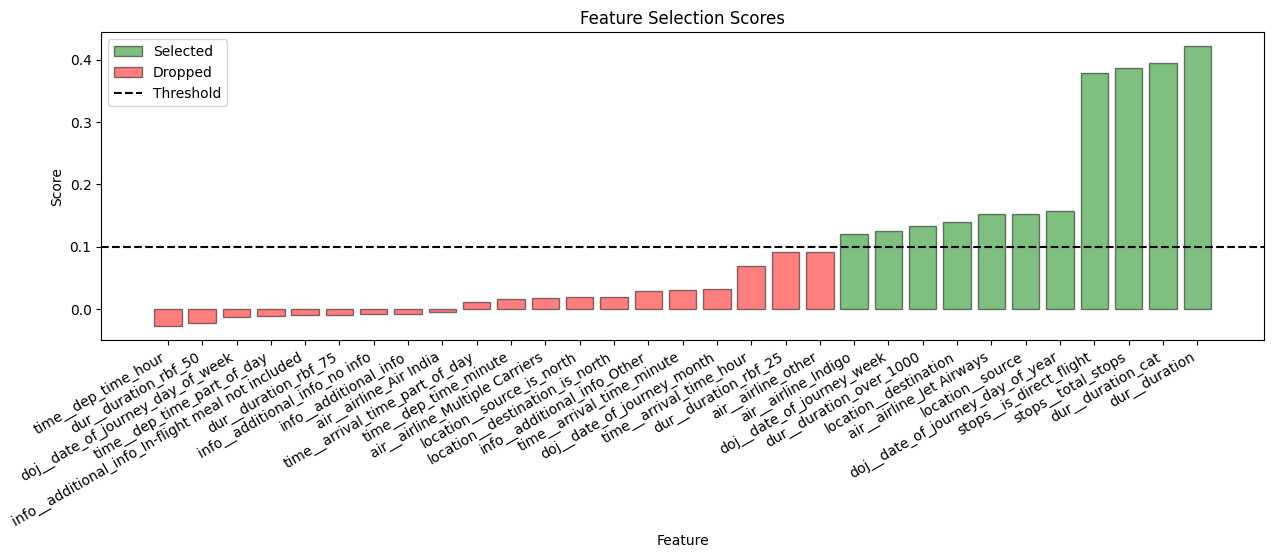

In [59]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()

### The dataset went upto 31 columns after Feature Engineering
### The Feature Selection algorithm selected 11 features out of that